In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb

df = pd.read_parquet('./Crimes_2019_to_2024_Final.parquet')

In [2]:
print(df.columns)

Index(['Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Year', 'datetime', 'Community Area Name', 'temp_max',
       'temp_min', 'rain_mm', 'snow_cm', 'Community_Area_Population',
       'Community_Area_Density', 'is_holiday', 'hour', 'month', 'day_of_week',
       'period_of_day'],
      dtype='object')


## Consultas SQL Analíticas com DuckDB

In [3]:
# -- Quais bairros tiveram a maior taxa de police reports por população em 2024 --

query1 = """
SELECT 
    "Community Area Name",
    COUNT(*) AS total_reports,
    AVG("Community_Area_Population") AS avg_pop,
    (COUNT(*) / AVG("Community_Area_Population")) AS reports_per_pop
FROM df
WHERE("Year") = 2024
GROUP BY "Community Area Name"
ORDER BY reports_per_pop DESC
LIMIT 10
"""

result1 = duckdb.query(query1).to_df()
result1

,Community Area Name,total_reports,avg_pop,reports_per_pop
0,FULLER PARK,704,2221.0,0.316974
1,ENGLEWOOD,5222,21411.0,0.243893
2,WEST GARFIELD PARK,3774,15619.0,0.241629
3,LOOP,9322,42181.0,0.221000
4,GREATER GRAND CROSSING,6510,29563.0,0.220208
5,NORTH LAWNDALE,6602,31244.0,0.211305
6,CHATHAM,5858,30783.0,0.190300
7,EAST GARFIELD PARK,3864,20526.0,0.188249
8,WASHINGTON PARK,2455,13111.0,0.187247
9,WEST ENGLEWOOD,4641,26729.0,0.173632


In [4]:
# -- Quais foram os crimes mais cometidos em feriados durante o período --

query2 = """
SELECT 
    "Primary Type",
    COUNT(*) AS total_reports
FROM df
WHERE("is_holiday") = TRUE AND "Primary Type" != 'OTHER OFFENSE'
GROUP BY "Primary Type"
ORDER BY total_reports DESC
LIMIT 10
"""

result2 = duckdb.query(query2).to_df()
result2

,Primary Type,total_reports
0,BATTERY,8210
1,THEFT,7937
2,CRIMINAL DAMAGE,5010
3,ASSAULT,3452
4,MOTOR VEHICLE THEFT,2903
5,DECEPTIVE PRACTICE,2664
6,WEAPONS VIOLATION,1725
7,ROBBERY,1545
8,BURGLARY,1325
9,NARCOTICS,1104


In [5]:
# -- Quais bairros tem a menor e maior porcentagens de prisões em relação ao número de crimes registrados --

query3 = """
SELECT
    "Community Area Name",
    COUNT(*) AS total_reports,
    SUM(CASE WHEN "Arrest" = TRUE THEN 1 ELSE 0 END) AS total_arrests,
    (SUM(CASE WHEN "Arrest" = TRUE THEN 1 ELSE 0 END) * 1.0 / COUNT(*)) AS arrest_percentage
FROM df
GROUP BY "Community Area Name"
ORDER BY arrest_percentage ASC
LIMIT 10
"""

result3 = duckdb.query(query3).to_df()
result3

,Community Area Name,total_reports,total_arrests,arrest_percentage
0,FOREST GLEN,3195,178.0,0.055712
1,HYDE PARK,11944,688.0,0.057602
2,LINCOLN PARK,22012,1326.0,0.060240
3,KENWOOD,9928,668.0,0.067284
4,NORTH CENTER,7727,536.0,0.069367
5,EDISON PARK,1663,118.0,0.070956
6,ASHBURN,12937,1029.0,0.079539
7,OAKLAND,4487,360.0,0.080232
8,NORTH PARK,5257,422.0,0.080274
9,NORWOOD PARK,7210,579.0,0.080305


In [6]:
query3_desc = query3.replace("ASC", "DESC")

result3_desc = duckdb.query(query3_desc).to_df()
result3_desc

,Community Area Name,total_reports,total_arrests,arrest_percentage
0,WEST GARFIELD PARK,27391,9102.0,0.332299
1,HUMBOLDT PARK,40999,11239.0,0.274129
2,NORTH LAWNDALE,43493,11541.0,0.265353
3,EAST GARFIELD PARK,24072,5133.0,0.213235
4,FULLER PARK,4227,821.0,0.194228
5,PULLMAN,6212,1200.0,0.193175
6,WEST ENGLEWOOD,31540,5840.0,0.185162
7,AUSTIN,77272,14031.0,0.181579
8,SOUTH LAWNDALE,23944,4336.0,0.181089
9,ENGLEWOOD,31073,5608.0,0.180478


In [7]:
# -- Qual foi a variação mensal no número de crimes registrados --

query4 = """
SELECT
    "Month",
    COUNT(*) AS total_reports
FROM df
GROUP BY "Month"
ORDER BY "Month" ASC
"""

result4 = duckdb.query(query4).to_df()
result4

,month,total_reports
0,1,111969
1,2,102741
2,3,112770
3,4,108290
4,5,123850
5,6,126236
6,7,133479
7,8,131725
8,9,127017
9,10,127630


In [8]:
# -- Qual é a taxa de prisão em crimes que acontecem em dias que neva versus dias que não neva --

query5 = """
SELECT
    "snow_cm" > 0 AS is_snowy,
    COUNT(*) AS total_reports,
    SUM(CASE WHEN "Arrest" = TRUE THEN 1 ELSE 0 END) AS total_arrests,
    (SUM(CASE WHEN "Arrest" = TRUE THEN 1 ELSE 0 END) * 1.0 / COUNT(*)) AS arrest_percentage
FROM df
GROUP BY is_snowy
"""

result5 = duckdb.query(query5).to_df()
result5

,is_snowy,total_reports,total_arrests,arrest_percentage
0,False,1283349,185764.0,0.144749
1,True,152581,24934.0,0.163415


In [9]:
# -- Quais crimes tem as maiores e menores taxas de prisão --

query6 = """
SELECT
    "Primary Type",
    COUNT(*) AS total_reports,
    SUM(CASE WHEN "Arrest" = TRUE THEN 1 ELSE 0 END) AS total_arrests,
    (SUM(CASE WHEN "Arrest" = TRUE THEN 1 ELSE 0 END) * 1.0 / COUNT(*)) AS arrest_percentage
FROM df
GROUP BY "Primary Type"
ORDER BY arrest_percentage ASC
LIMIT 10
"""

result6 = duckdb.query(query6).to_df()
result6

,Primary Type,total_reports,total_arrests,arrest_percentage
0,RITUALISM,1,0.0,0.000000
1,DECEPTIVE PRACTICE,105295,3038.0,0.028852
2,INTIMIDATION,1033,30.0,0.029042
3,MOTOR VEHICLE THEFT,101361,3334.0,0.032892
4,HUMAN TRAFFICKING,74,3.0,0.040541
5,CRIMINAL DAMAGE,161923,6640.0,0.041007
6,BURGLARY,48483,2623.0,0.054101
7,CRIMINAL SEXUAL ASSAULT,8344,497.0,0.059564
8,THEFT,314682,19348.0,0.061484
9,KIDNAPPING,730,48.0,0.065753


In [10]:
query6_desc = query6.replace("ASC", "DESC")

result6_desc = duckdb.query(query6_desc).to_df()
result6_desc

,Primary Type,total_reports,total_arrests,arrest_percentage
0,GAMBLING,226,224.0,0.991150
1,NARCOTICS,43372,42839.0,0.987711
2,LIQUOR LAW VIOLATION,1140,1123.0,0.985088
3,PROSTITUTION,1852,1822.0,0.983801
4,CONCEALED CARRY LICENSE VIOLATION,866,833.0,0.961894
5,PUBLIC INDECENCY,44,41.0,0.931818
6,INTERFERENCE WITH PUBLIC OFFICER,4172,3814.0,0.914190
7,OBSCENITY,315,204.0,0.647619
8,WEAPONS VIOLATION,48912,30386.0,0.621238
9,OTHER NARCOTIC VIOLATION,30,16.0,0.533333


## Análise Exploratória e Teste de Hipóteses

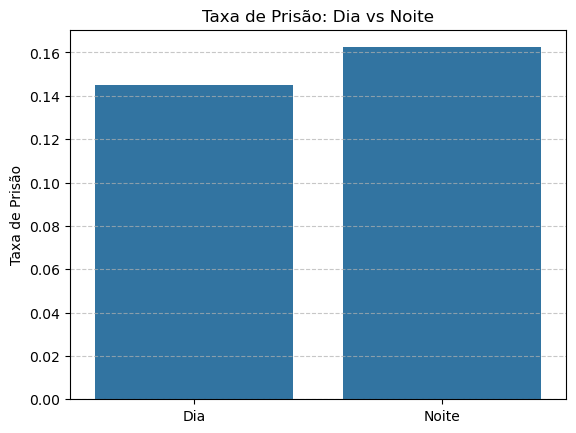

In [11]:
# H1: prisão é mais provavel em crimes que acontecem de dia do que a noite

is_dia = df[(df['period_of_day'] == 'MORNING') | (df['period_of_day'] == 'AFTERNOON')]
is_noite = df[(df['period_of_day'] == 'NIGHT') | (df['period_of_day'] == 'DAWN')]


taxa_prisao_dia = is_dia['Arrest'].mean()
taxa_prisao_noite = is_noite['Arrest'].mean()

# Grafico comparativo
labels = ['Dia', 'Noite']
values = [taxa_prisao_dia, taxa_prisao_noite]
sns.barplot(x=labels, y=values)
plt.title('Taxa de Prisão: Dia vs Noite')
plt.ylabel('Taxa de Prisão')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

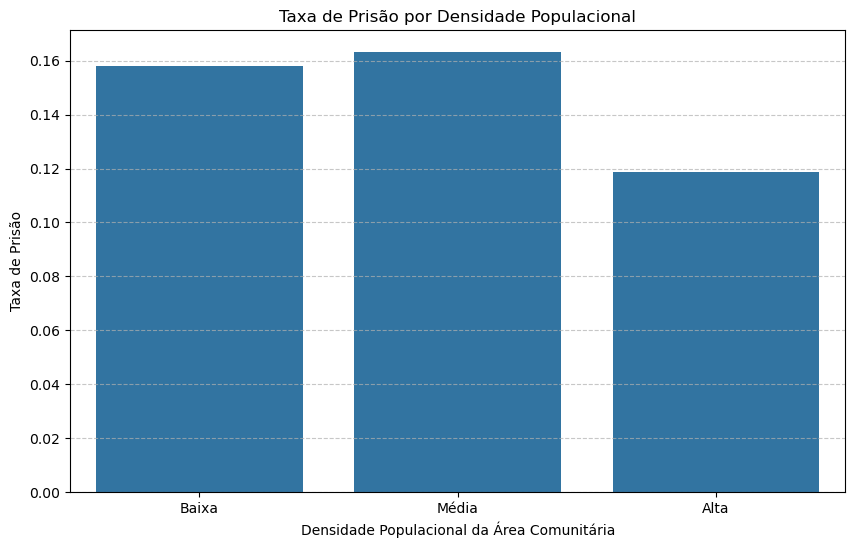

In [ ]:
# H2: Áreas com maior densidade populacional têm mais prisões

# Separa as 'Community Area' em 3 grupos com base na densidade populacional
df['pop_density_group'] = pd.qcut(df['Community_Area_Density'], q=3, labels=['Baixa', 'Média', 'Alta'])

plt.figure(figsize=(10, 6))
sns.barplot(x='pop_density_group', y='Arrest', data=df, errorbar=None)

plt.title('Taxa de Prisão por Densidade Populacional')
plt.xlabel('Densidade Populacional da Área Comunitária')
plt.ylabel('Taxa de Prisão')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

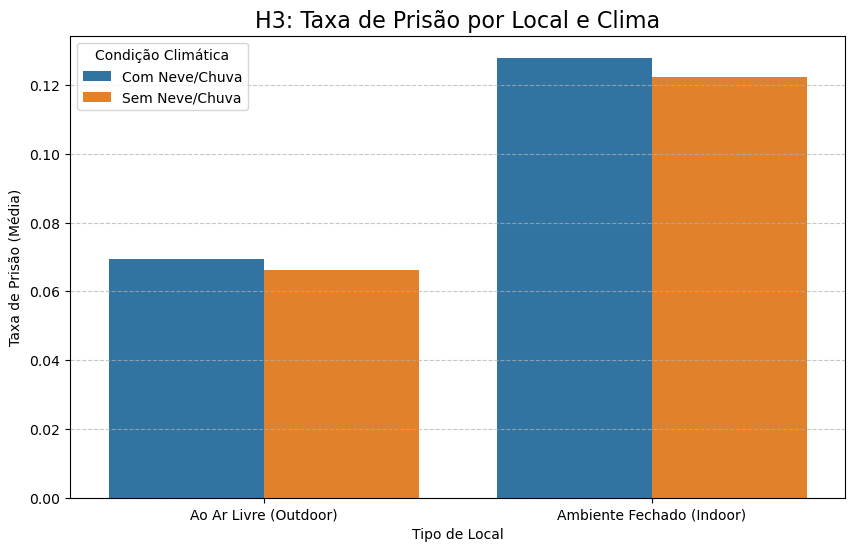

In [ ]:
# H3: Ocorrencia de neve ou muita chuva diminui a taxa de prisões, mas só em crimes que ocorrem ao ar livre
df_person_crimes = df[(df['Primary Type'] == 'THEFT') | (df['Primary Type'] == 'BATTERY') | (df['Primary Type'] == 'ASSAULT') | (df['Primary Type'] == 'MOTOR VEHICLE THEFT')]

outdoor_locations = [
    'STREET', 'ALLEY', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 
    'PARK PROPERTY', 'VACANT LOT / LAND', 'HIGHWAY/EXPRESSWAY', 
    'BRIDGE', 'RIVERBANK', 'BEACH', 'GOLF COURSE', 'PLAYGROUND', 'CTA PLATFORM',
    'RESIDENCE - YARD (FRONT / BACK)', 'LAKEFRONT / WATERFRONT / RIVERBANK', 'CTA BUS STOP',
    'FOREST PRESERVE', 'DRIVEWAY - RESIDENTIAL', 'SCHOOL - PUBLIC GROUNDS', 'ATM (AUTOMATIC TELLER MACHINE)',
    'CONSTRUCTION SITE', 'PARKING LOT / GARAGE (NON RESIDENTIAL)', 'POLICE FACILITY / VEHICLE PARKING LOT',
]

outdoor_crimes = df_person_crimes[df_person_crimes['Location Description'].isin(outdoor_locations)]
indoor_crimes = df_person_crimes[~df_person_crimes['Location Description'].isin(outdoor_locations)]

snow_rain_outdoor = outdoor_crimes[(outdoor_crimes['snow_cm'] > 0) | (outdoor_crimes['rain_mm'] >= 0.4)]
snow_rain_indoor = indoor_crimes[(indoor_crimes['snow_cm'] > 0) | (indoor_crimes['rain_mm'] >= 0.4)]

no_snow_rain_outdoor = outdoor_crimes[(outdoor_crimes['snow_cm'] == 0) & (outdoor_crimes['rain_mm'] < 0.4)]
no_snow_rain_indoor = indoor_crimes[(indoor_crimes['snow_cm'] == 0) & (indoor_crimes['rain_mm'] < 0.4)]

taxa_prisao_outdoor_sr = snow_rain_outdoor['Arrest'].mean()
taxa_prisao_indoor_sr = snow_rain_indoor['Arrest'].mean()

taxa_prisao_outdoor_nsr = no_snow_rain_outdoor['Arrest'].mean()
taxa_prisao_indoor_nsr = no_snow_rain_indoor['Arrest'].mean()

# Grafico comparativo
data_para_plotar = {
    'Tipo de Local': [
        'Ao Ar Livre (Outdoor)', 
        'Ambiente Fechado (Indoor)', 
        'Ao Ar Livre (Outdoor)', 
        'Ambiente Fechado (Indoor)'
    ],
    'Condição Climática': [
        'Com Neve/Chuva', 
        'Com Neve/Chuva', 
        'Sem Neve/Chuva', 
        'Sem Neve/Chuva'
    ],
    'Taxa de Prisão': [
        taxa_prisao_outdoor_sr, 
        taxa_prisao_indoor_sr, 
        taxa_prisao_outdoor_nsr, 
        taxa_prisao_indoor_nsr
    ]
}

df_plot = pd.DataFrame(data_para_plotar)

# 2. Crie o gráfico de barras agrupado com Seaborn
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_plot,
    x='Tipo de Local',
    y='Taxa de Prisão',
    hue='Condição Climática'
)

plt.title('H3: Taxa de Prisão por Local e Clima', fontsize=16)
plt.ylabel('Taxa de Prisão (Média)')
plt.xlabel('Tipo de Local')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Condição Climática')
plt.show()

In [23]:
# lista os crimes mais registrados (todos)

crime_counts = df['Primary Type'].value_counts()
print(crime_counts)

Primary Type
THEFT                                314682
BATTERY                              261518
CRIMINAL DAMAGE                      161923
ASSAULT                              125617
DECEPTIVE PRACTICE                   105295
MOTOR VEHICLE THEFT                  101361
OTHER OFFENSE                         90259
ROBBERY                               52855
WEAPONS VIOLATION                     48912
BURGLARY                              48483
NARCOTICS                             43372
CRIMINAL TRESPASS                     27683
OFFENSE INVOLVING CHILDREN            11777
CRIMINAL SEXUAL ASSAULT                8344
SEX OFFENSE                            7287
PUBLIC PEACE VIOLATION                 5819
INTERFERENCE WITH PUBLIC OFFICER       4172
HOMICIDE                               4085
ARSON                                  2902
STALKING                               2284
PROSTITUTION                           1852
LIQUOR LAW VIOLATION                   1140
INTIMIDATION       